In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets


Cancer = datasets.load_breast_cancer()
X = Cancer.data
T = Cancer.target

C= len(set(list(T)))
F = X.shape[1]

In [2]:
print(Cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
# Read the DataFrame, first using the feature data
import pandas as pd
df = pd.DataFrame(Cancer.data, columns=Cancer.feature_names)
# Add a target column, and fill it with the target data
df['target'] = Cancer.target
# Show the first five rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
x=X[0]
t=T[0]

In [6]:
W = np.random.randn(C,F)

In [7]:
p = np.exp(W @ x)
y = p/sum(p)

In [8]:
print(y)
print(sum(y))

[0. 1.]
1.0


In [9]:
L = - np.log(y[t])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [10]:
dW = np.zeros_like(W)

In [11]:
for c in range(C):
    dW[c] = (y[c] - 1) * x if c==t else y[c] * x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


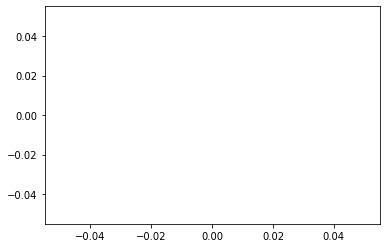

In [12]:
Ls=[] # this array will hold the neg. log likelihood as it decreases throughout 
# the algorithm
W = np.random.randn(C,F) # Our model weights, randomly initialized
alpha = 5e-4 # The learning rate
for e in range(1000): # We will perform 1000 steps of gradient descent
  dW = np.zeros_like(W) #initialize gradient to zero
  L=0 #initialize the neg.log likelihood sum
  for x,t in zip(X,T): #loop through dataset
    p = np.exp(W @ x) #soft-max
    y = p/sum(p) 
    L += -np.log(y[t]) #add neg. log. likelihood for datapoint
    for c in range(C):# compute gradient for datapoint
        dW[c] += (y[c] - 1) * x if c==t else y[c] * x    
  W -= alpha*dW # move weights in direction oposite to gradient
  Ls.append(L) # keep record of neg. log likelihood
plt.plot(Ls,'r-') # plot trajectory of L during gradient descent **V. IMPORTANT**

In [13]:
correct = 0
for x,t in zip(X,T):
  a_pred = W @ x
  correct += (a_pred.argmax() == t)
print(f'accuracy={correct/len(T)}')

accuracy=0.37258347978910367
